In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x_train = pd.read_csv('../data/processed/x_train_processed.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
x_test = pd.read_csv('../data/processed/x_test_processed.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
x_train

,Number of Stops,Flight Duration (hours),Days Until Departure,Airline_Air_India,Airline_GO_FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Departure City_Chennai,Departure City_Delhi,...,Departure Time_Evening,Departure Time_Late Night,Departure Time_Morning,Departure Time_Night,Arrival Time_Early Morning,Arrival Time_Evening,Arrival Time_Late Night,Arrival Time_Morning,Arrival Time_Night,Flight Class_Economy
0,1,0.541602,1.622418,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
1,1,-0.550816,-1.180527,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
2,1,0.970766,-0.516671,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,1,1.713443,-1.844382,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
4,1,-0.120258,1.032325,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238347,1,0.471932,-0.885480,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
238348,1,1.064123,-1.623097,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
238349,1,-0.318120,0.811040,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,True
238350,1,0.169567,-1.401812,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True


In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [5]:
results = {}

# 1. Linear Regression

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(x_test)
results['LinearRegression'] = (model.score(x_test, y_test),np.sqrt(mean_squared_error(y_test, y_pred)))
results['LinearRegression']

(0.9094068677274052, 81.8566167886982)

# 2. Random Forest Regressor

In [8]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train.values)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(x_test)
results['RandomForestRegressor'] = (model.score(x_test, y_test),np.sqrt(mean_squared_error(y_test, y_pred)))
results['RandomForestRegressor']

(0.9852784215278272, 32.997675104600965)

# 3. K-Nearest Neighbors Regressor (KNN)

In [10]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

KNeighborsRegressor()

In [11]:
y_pred = model.predict(x_test)
results['KNeighborsRegressor'] = (model.score(x_test, y_test),np.sqrt(mean_squared_error(y_test, y_pred)))
results['KNeighborsRegressor']

(0.97128382713644, 46.08604425349906)

# 4. Decision Tree Regressor

In [12]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [13]:
y_pred = model.predict(x_test)
results['Decision Tree'] = (model.score(x_test, y_test),np.sqrt(mean_squared_error(y_test, y_pred)))
results['Decision Tree']

(0.9764791877873273, 41.70924324920669)

# Gradient Boosting (LightGBM)

In [14]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
results['LightGBM'] = (model.score(x_test, y_test), np.sqrt(mean_squared_error(y_test, y_pred)))
results['LightGBM']

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 238352, number of used features: 29
[LightGBM] [Info] Start training from score 252.058499


(0.9695914378684126, 47.42464575274585)

# Tabular Summary of Model Performance: R² Score and RMSE

In [16]:
from tabulate import tabulate
table = [(key, value[0], value[1]) for key, value in results.items()]
print(tabulate(table, headers=["Model", "R^2 Score", "RMSE"], tablefmt="pretty"))

+-----------------------+--------------------+--------------------+
|         Model         |     R^2 Score      |        RMSE        |
+-----------------------+--------------------+--------------------+
|   LinearRegression    | 0.9094068677274052 |  81.8566167886982  |
| RandomForestRegressor | 0.9852784215278272 | 32.997675104600965 |
|  KNeighborsRegressor  |  0.97128382713644  | 46.08604425349906  |
|     Decision Tree     | 0.9764791877873273 | 41.70924324920669  |
|       LightGBM        | 0.9695914378684126 | 47.42464575274585  |
+-----------------------+--------------------+--------------------+


# Visual Comparison of Model Performance: R² Score vs. RMSE

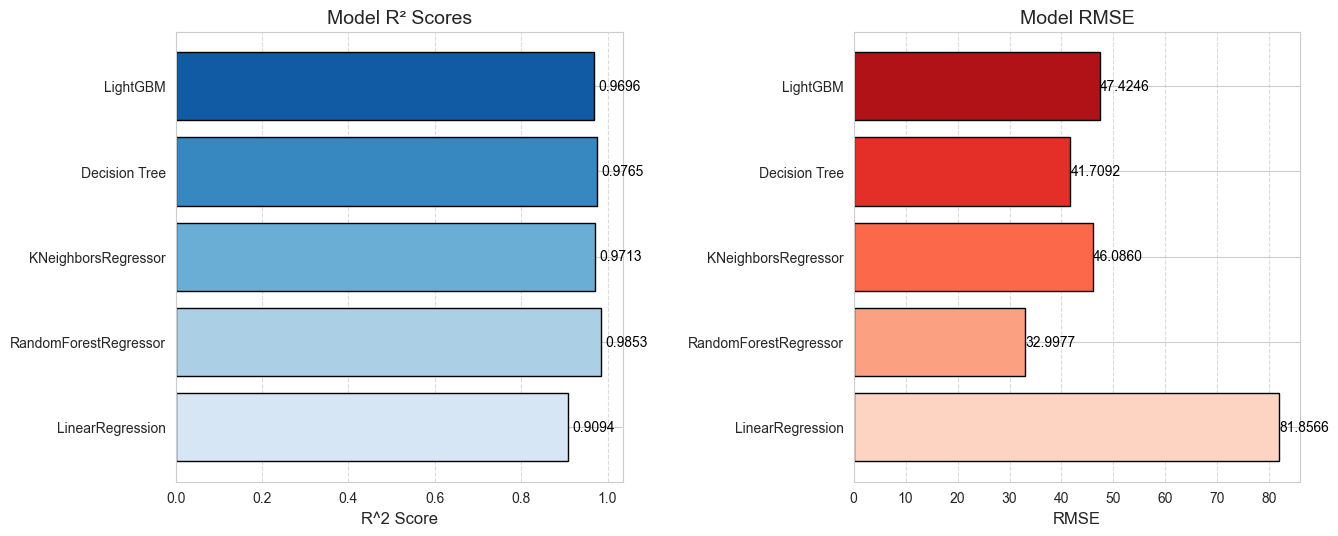

In [28]:
sns.set_style("whitegrid")

models = list(results.keys())
r2_scores = [value[0] for value in results.values()]
rmse_values = [value[1] for value in results.values()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1]})

r2_colors = sns.color_palette("Blues", len(models))
rmse_colors = sns.color_palette("Reds", len(models))

bars1 = ax1.barh(models, r2_scores, color=r2_colors, edgecolor='black')
ax1.set_xlabel('R^2 Score', fontsize=12)
ax1.set_title('Model R² Scores', fontsize=14)
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)

bars2 = ax2.barh(models, rmse_values, color=rmse_colors, edgecolor='black')
ax2.set_xlabel('RMSE', fontsize=12)
ax2.set_title('Model RMSE', fontsize=14)
ax2.grid(True, axis='x', linestyle='--', alpha=0.7)

for bar in bars1:
    ax1.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10, color='black')

for bar in bars2:
    ax2.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout(pad=3.0)
plt.show()
